# Financial Data Preprocessing

## Download Stock Price Historical Data from Yahoo Finance

### Tesla Stock Price Historical data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf 

tesla_data=yf.download('TSLA',start="2015-01-01",end="2024-12-31")
tesla_data.index = tesla_data.index.date
tesla_data = tesla_data.reset_index().rename(columns={"index": "Date"})
tesla_data.to_csv("../data/tesla_data.csv")


[*********************100%***********************]  1 of 1 completed


In [23]:
tesla_data

In [ ]:
TSLA_data=pd.read_csv("../data/tesla_data.csv")
TSLA_data.drop(columns={'Price'},index=0,axis=0,inplace=True)
TSLA_data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
1,2015-01-02,14.620667457580566,14.620667457580566,14.883333206176758,14.21733283996582,14.857999801635742,71466000
2,2015-01-05,14.005999565124512,14.005999565124512,14.433333396911621,13.810667037963867,14.303333282470703,80527500
3,2015-01-06,14.085332870483398,14.085332870483398,14.279999732971191,13.61400032043457,14.003999710083008,93928500
4,2015-01-07,14.063332557678223,14.063332557678223,14.3186674118042,13.985333442687988,14.223333358764648,44526000
5,2015-01-08,14.041333198547363,14.041333198547363,14.25333309173584,14.000666618347168,14.187333106994629,51637500


In [41]:
TSLA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 1 to 2479
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       2479 non-null   object
 1   Adj Close  2479 non-null   object
 2   Close      2479 non-null   object
 3   High       2479 non-null   object
 4   Low        2479 non-null   object
 5   Open       2479 non-null   object
 6   Volume     2479 non-null   object
dtypes: object(7)
memory usage: 135.7+ KB


In [42]:
TSLA_data.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [44]:
TSLA_data.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

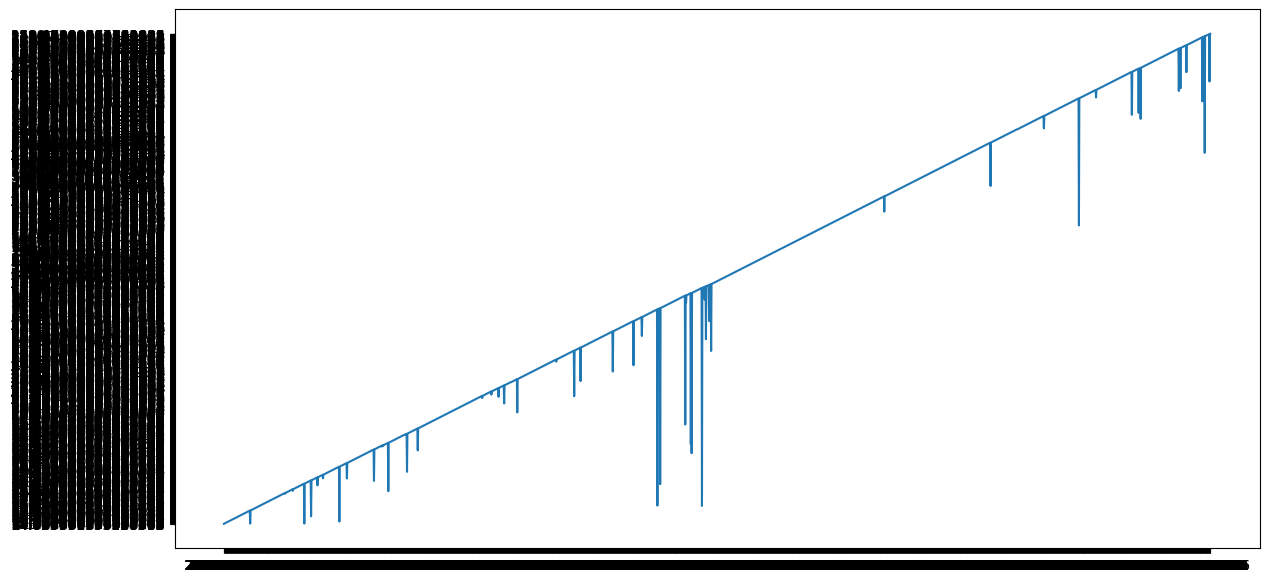

In [46]:
TSLA_data.set_index('Date',inplace=True)
plt.figure(figsize=(14,7))
plt.plot(TSLA_data['Close'])
plt.show()

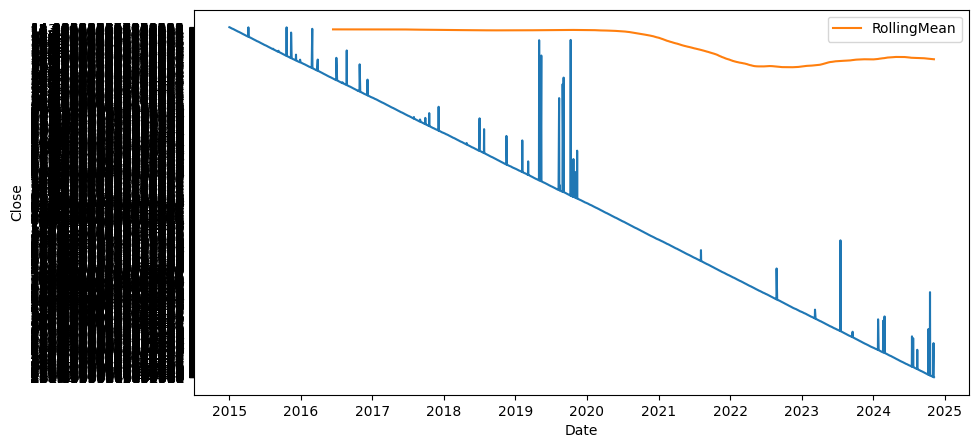

In [ ]:
import seaborn as sns
TSLA_data.index=pd.to_datetime(TSLA_data.index)
TSLA_data["rollingMean"]=TSLA_data['Close'].rolling(window=365).mean()
plt.figure(figsize=(10,5))
sns.lineplot(TSLA_data,x=TSLA_data.index,y=TSLA_data['Close'])
sns.lineplot(TSLA_data,x=TSLA_data.index,y=TSLA_data["rollingMean"],label="RollingMean")
plt.yt
plt.legend()

Test Statistics: -1.012794233263794
p-Value: 0.748569342632932
Lag used: 27
Number of observation: 27
Critical Values': {'1%': np.float64(-3.433020812670638), '5%': np.float64(-2.8627199404827794), '10%': np.float64(-2.567398129768597)}
Conclusion: Non-Stationary


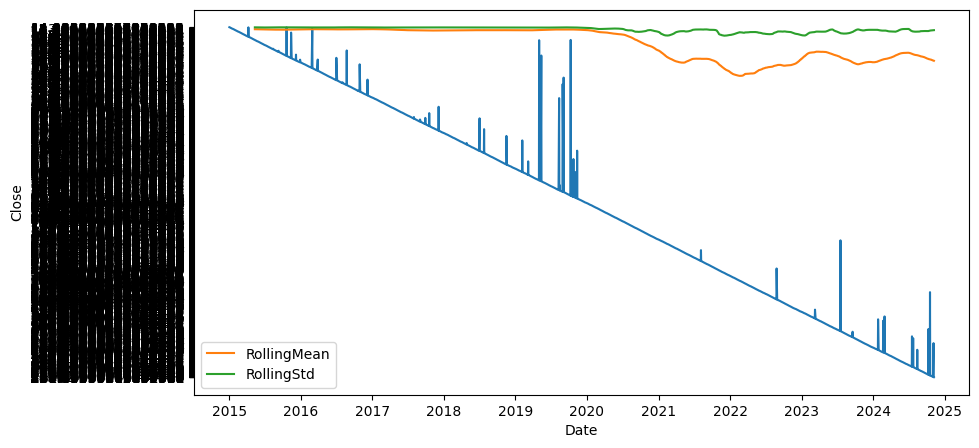

In [53]:
from statsmodels.tsa.stattools import adfuller
def check_stationarity(df,col):
    df["rollingMean"]=df[col].rolling(window=90).mean()
    df["rollingStd"]=df[col].rolling(window=90).std()
    result=adfuller(df[col],autolag="AIC")
    
    print(f"Test Statistics: {result[0]}")
    print(f"p-Value: {result[1]}")
    print(f"Lag used: {result[2]}")
    print(f"Number of observation: {result[2]}")
    print(f"Critical Values': {result[4]}")
    print(f"Conclusion: {'Stationary' if result[1] < 0.05 else 'Non-Stationary'}")
    
    plt.figure(figsize=(10,5))
    sns.lineplot(df,x=df.index,y=df[col])
    sns.lineplot(df,x=df.index,y=df["rollingMean"],label="RollingMean")
    sns.lineplot(df,x=df.index,y=df["rollingStd"],label="RollingStd")
    plt.legend()
    
check_stationarity(TSLA_data,'Close')

In [54]:
TSLA_data.tail()

,Adj Close,Close,High,Low,Open,Volume,rollingMean,rollingStd
Date,,,,,,,,
2024-10-31,249.85000610351562,249.85000610351562,259.75,249.25,257.989990234375,66575300,229.763667,20.273722
2024-11-01,248.97999572753906,248.97999572753906,254.0,246.6300048828125,252.0399932861328,57544800,230.348223,20.057360
2024-11-04,242.83999633789062,242.83999633789062,248.89999389648438,238.8800048828125,244.55999755859375,68802400,230.852889,19.789155
2024-11-05,251.44000244140625,251.44000244140625,255.27999877929688,246.2100067138672,247.33999633789062,69282500,231.448000,19.590783
2024-11-06,288.5299987792969,288.5299987792969,289.5899963378906,275.6199951171875,284.6700134277344,164827600,232.322112,20.356828
